# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")


df = pd.read_csv(os.path.join(os.getcwd(), "data", "text.csv"), header=0)
df = df[['text','label']]

## The last example is null so it was dropped from the dataset.
df = df.head(107744)
df.head()

,text,label
0,i just feel really helpless and heavy hearted,4.0
1,ive enjoyed being able to slouch about relax a...,0.0
2,i gave up my internship with the dmrg and am f...,4.0
3,i dont know i feel so lost,0.0
4,i am a kindergarten teacher and i am thoroughl...,4.0


In [3]:
df.shape

(107744, 2)

## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

1. I have chosen the [Emotions](https://www.kaggle.com/datasets/nelgiriyewithana/emotions) dataset from Kaggle which classifies short Tweets by the emotions they convey. After creating such a model, I want to see how it categorizes the Instagram comments on my account @whatsernamie, which I acquired with the Instagram Graph API.
2. Using only the text of the Tweets, I want to predict the emotion of the message. In the dataset, the label column of numerical representation of emotions (sadness (0), joy (1), love (2), anger (3), fear (4), and surprise (5)) is called 'label.'
3. This is a supervised machine learning problem because of the use of a label to train the model to predict the information the label represents.  This is a multi-class classification problem because it classifies 6 distinct unordered categories (nominal data).
4. The only feature available from the raw dataset is the text of the Tweet, however, these texts will eventually be converted into features via text vectorization.
5. This is an important problem for social media influencers or businesses with an online presence. Being able to quickly predict the emotions of several incoming comments is crucial for understanding the emotional impact of a post, and whether this response aligns with the goals of the account holder or the company. Marketing requires strategizing content creation to get viewers to take a certain action, whether it's buying a product, donating to a cause, or simply clicking the follow button. Oftentimes, this is done by appealing to strong emotions like joy or sadness. In my case, I would like to use this model to get a quick overview of the emotional impact of my posts on my audience. Is it overall making them happy, making them angry, or making them sad? I would use this information to assess whether my content aligns with my goals of making other artists feel happy and inspired, and reduce content that doesn't align, like making posts that make people feel sad.

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

#### Addressing Missing Values


In [4]:
df.isnull().values.any()

False

No missing values!

#### Observing Class Representation

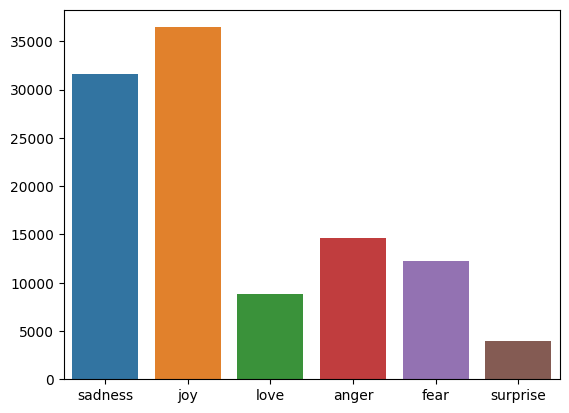

In [5]:
emotion_counts = []
for i in range(6):
    emotion_counts.append(np.sum(df['label']==i, axis = 0))
class_rep = {'Emotion': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], 'Count': emotion_counts}
sns.barplot(data=class_rep, x='Emotion', y='Count')
plt.show()

In [6]:
emotion_counts

[31634, 36461, 8872, 14624, 12222, 3931]

In [7]:
print('(joy) / (surprise): ' + str(31634/3931))
print('(sadness+joy) / (love+anger+fear+surprise): ' + str((31634+36461)/(8872+14624+12222+3931)))

(joy) / (surprise): 8.04731620452811
(sadness+joy) / (love+anger+fear+surprise): 1.7174455850084491


The majority of the examples are categorized under "sadness" and "joy". The ratio of "joy" examples (most represented) to "surprise" examples (least represented) is about 8 to 1. The ratio of the two dominant classes to the non-dominant classes is about 2 to 1. Since sadness and joy are general emotions that are likely easiest for humans to spot (similar to recognizing positive versus negative sentiment), it makes sense that they would be dominant. 

However, it may be useful to equalize the classes to have the same number of examples and compare the models. Since there are over 100,000 examples in this dataset, I will just randomly drop examples from classes until they all have the same number of examples as surprise. I will also try creating a dataset that randomly drops half the datapoints from "sadness" and "joy" so they are closer to the class representation of "anger".

#### Equal Classes

In [8]:
smallest_class_size = min(emotion_counts)
smallest_class_size

3931

In [9]:
df_equal = df
for i in range(6):
    df_to_drop = df[df['label']==i]
    indices = np.random.choice(df_to_drop.index, size=len(df_to_drop)-smallest_class_size, replace=False)
    rows = df.loc[indices]
    df_equal = df_equal.drop(index=indices)

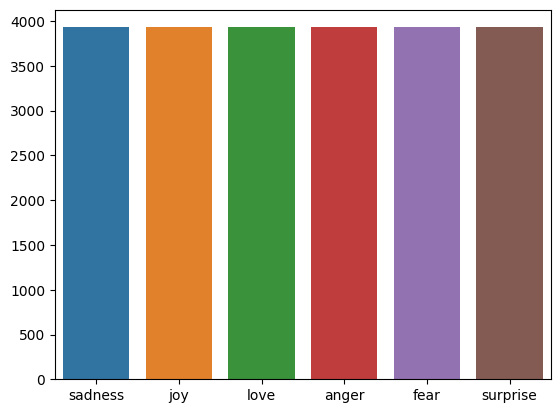

In [10]:
emotion_counts = []
for i in range(6):
    emotion_counts.append(np.sum(df_equal['label']==i, axis = 0))
class_rep = {'Emotion': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], 'Count': emotion_counts}
sns.barplot(data=class_rep, x='Emotion', y='Count')
plt.show()

#### Reduce Sadness/Joy

In [11]:
df_reduce = df
for i in range(2):
    df_to_drop = df[df['label']==i]
    indices = np.random.choice(df_to_drop.index, size=len(df_to_drop)//2, replace=False)
    rows = df.loc[indices]
    df_reduce = df_reduce.drop(index=indices)

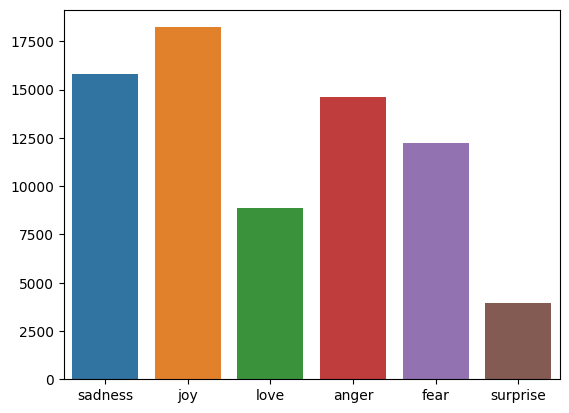

In [12]:
emotion_counts = []
for i in range(6):
    emotion_counts.append(np.sum(df_reduce['label']==i, axis = 0))
class_rep = {'Emotion': ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise'], 'Count': emotion_counts}
sns.barplot(data=class_rep, x='Emotion', y='Count')
plt.show()

#### Examples of Each Emotion

<b>Sadness:</b>

In [13]:
for x in df.loc[df['label'] == 0].head()['text']:
    print(x)

ive enjoyed being able to slouch about relax and unwind and frankly needed it after those last few weeks around the end of uni and the expo i have lately started to find myself feeling a bit listless which is never really a good thing
i dont know i feel so lost
i was beginning to feel quite disheartened
i can still lose the weight without feeling deprived
im feeling a little like a damaged tree and that my roots are a little out of wack


<b>Joy:</b>

In [14]:
for x in df.loc[df['label'] == 1].head()['text']:
    print(x)

i fear that they won t ever feel that delicious excitement of christmas eve at least not in the same way i remember doing it
i try to be nice though so if you get a bitchy person on the phone or at the window feel free to have a little fit and throw your pen at her face
i have officially graduated im not feeling as ecstatic as i thought i would
i feel my portfolio demonstrates how eager i am to learn but some who know me better might call it annoyingly persistent
i may be more biased than the next because i have a dependent life to take care of and to keep safe but i feel we all need to take care of ourselves as well


<b>Love:</b>

In [15]:
for x in df.loc[df['label'] == 2].head()['text']:
    print(x)

i would think that whomever would be lucky enough to stay in this suite must feel like it is the most romantic place on earth
i guess that feeling is what im really getting all nostalgic about
i was less intelligent and could not really feel through my music was not passionate about the little things im not sure i would go for it
i think a guy can make up for lacking funds in romantic ways to make his lady feel taken care of and loved
i would want to thank them for letting my heart feel the lovely phenomenon for the first time


<b>Anger:</b>

In [16]:
for x in df.loc[df['label'] == 3].head()['text']:
    print(x)

i feel like a jerk because the library students who all claim to love scrabble cant be bothered to participate and clearly scrabble is an inappropriate choice for a group of students whose native language isnt english
i miss all the others as well that feel that i wronged them and they will soon understand that i didnt
i saunter through the airport terminals feeling that i have had an experience that renders the petty tribulations of everyday travel somehow far less significant
i need to feel dangerous and pretty so here a striking dance pick deep in vogue minutes ago
when


<b>Fear:</b>

In [17]:
for x in df.loc[df['label'] == 4].head()['text']:
    print(x)

i just feel really helpless and heavy hearted
i gave up my internship with the dmrg and am feeling distraught
i am a kindergarten teacher and i am thoroughly weary of my job after having taken the university entrance exam i suffered from anxiety for weeks as i did not want to carry on with my work studies were the only alternative
i dunno i just feel scared to walk in after awhile it got ok but when i walk into this room w poorly erected brick walls separating the room into xm partitions
i feel a bit intimidated and out of my league due to his experience


<b>Surprise:</b>

In [18]:
for x in df.loc[df['label'] == 5].head()['text']:
    print(x)

im forever taking some time out to have a lie down because i feel weird
i was feeling really overwhelmed
i really love reading bible because i can feel the presence of the lord jesus and i feel every single word it says and also amazed on how this and that happened how jesus sacrifice just to save us from our sin and also looking back then on how he created everything in this world
im feeling a bit amazed and grateful about having landed amid such a congregation
i just sat there feeling this weird feeling and a few moments later the leader called out to wind it down so we could switch roles


Some of the texts seem to fit better with other emotions, which may be because it's a somewhat subjective matter and some texts can fit multiple emotions at once. For example, "i was feeling really overwhelmed" could fit well into both surprise and fear. Pe

#### Preprocessing the Text

I installed gensim to do simple text preprocessing. This function will remove some stop words, covert all text to lowercase, remove punctuation and tokenize the text.

In [19]:
# %pip install gensim
import gensim

In [20]:
original_df = df
df['text'] = df['text'].apply(lambda row: gensim.utils.simple_preprocess(row))
df['text']

0         [just, feel, really, helpless, and, heavy, hea...
1         [ive, enjoyed, being, able, to, slouch, about,...
2         [gave, up, my, internship, with, the, dmrg, an...
3                              [dont, know, feel, so, lost]
4         [am, kindergarten, teacher, and, am, thoroughl...
                                ...                        
107739    [im, feeling, generous, you, might, get, to, r...
107740    [feel, like, the, only, person, who, not, ente...
107741                          [feel, sooooooo, lethargic]
107742    [probably, could, add, lot, more, to, this, li...
107743    [im, feeling, in, love, my, beloved, mate, thi...
Name: text, Length: 107744, dtype: object

Gensim does not perform stemming so I will use NLTK to do this manually.

In [21]:
# %pip install nltk
import nltk

In [22]:
stemmer = nltk.stem.SnowballStemmer('english')
def stemming(wordlist, stemmer):
    stemmed = []
    for word in wordlist:
        stemmed.append(stemmer.stem(word))
    return stemmed

In [23]:
df['text'] = df['text'].apply(lambda row: stemming(row, stemmer))
df['text']

0         [just, feel, realli, helpless, and, heavi, heart]
1         [ive, enjoy, be, abl, to, slouch, about, relax...
2         [gave, up, my, internship, with, the, dmrg, an...
3                              [dont, know, feel, so, lost]
4         [am, kindergarten, teacher, and, am, thorough,...
                                ...                        
107739    [im, feel, generous, you, might, get, to, read...
107740    [feel, like, the, onli, person, who, not, ente...
107741                            [feel, sooooooo, letharg]
107742    [probabl, could, add, lot, more, to, this, lis...
107743    [im, feel, in, love, my, belov, mate, this, morn]
Name: text, Length: 107744, dtype: object

It looks like some more stop words could be removed, such as "feel", which appears to be in almost every example. These stop words provide no extra value to the model, since they're not useful in distinguishing the differences between each Tweet. I will remove some more stopwords using the stopwords list from NLTK.

In [24]:
from nltk.corpus import stopwords
# nltk.download('stopwords')
stop_words = stopwords.words('english')
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [25]:
def removeStopWords(wordlist, stop_words):
    cleaned = []
    for word in wordlist:
        if word not in stop_words:
            cleaned.append(word)
    return cleaned

In [26]:
df['text'] = df['text'].apply(lambda row: removeStopWords(row, stop_words))
df['text']

0                    [feel, realli, helpless, heavi, heart]
1         [ive, enjoy, abl, slouch, relax, unwind, frank...
2                [gave, internship, dmrg, feel, distraught]
3                                  [dont, know, feel, lost]
4         [kindergarten, teacher, thorough, weari, job, ...
                                ...                        
107739      [im, feel, generous, might, get, read, excerpt]
107740    [feel, like, onli, person, entertain, manufact...
107741                            [feel, sooooooo, letharg]
107742    [probabl, could, add, lot, list, would, onli, ...
107743                  [im, feel, love, belov, mate, morn]
Name: text, Length: 107744, dtype: object

Additionally, to find more overused words, I will use Gensim again to get the document frequency of each word, which is the number of documents that contain a certain word.

In [27]:
dictionary = gensim.corpora.Dictionary(tweet for tweet in df['text'])

In [28]:
len(dictionary.token2id)

26177

The following code returns a list of tuples with item[0] representing a word id and item[1] representing its document frequency. The top 3 values are present in over 10,000 documents, so they will be removed. 

In [29]:
sorted_freq = sorted(dictionary.dfs.items(), reverse=True, key=lambda x: x[1])
sorted_freq[:20]

[(0, 106291),
 (56, 18194),
 (77, 13981),
 (75, 7426),
 (32, 6362),
 (91, 6330),
 (4, 6307),
 (80, 6170),
 (264, 5589),
 (202, 5582),
 (248, 5477),
 (48, 5269),
 (63, 4783),
 (92, 4744),
 (121, 4699),
 (206, 4504),
 (23, 4365),
 (204, 4288),
 (65, 4228),
 (366, 4213)]

In [30]:
freq_words = []
for freq in sorted_freq[:3]:
    freq_words.append(list(dictionary.token2id.keys())[freq[0]])
freq_words

['feel', 'like', 'im']

These words don't look like that carry any informative value in emotion detection, so they can be dropped.

In [31]:
df['text'] = df['text'].apply(lambda row: removeStopWords(row, freq_words))
df['text']

0                          [realli, helpless, heavi, heart]
1         [ive, enjoy, abl, slouch, relax, unwind, frank...
2                      [gave, internship, dmrg, distraught]
3                                        [dont, know, lost]
4         [kindergarten, teacher, thorough, weari, job, ...
                                ...                        
107739                [generous, might, get, read, excerpt]
107740      [onli, person, entertain, manufactur, conflict]
107741                                  [sooooooo, letharg]
107742    [probabl, could, add, lot, list, would, onli, ...
107743                            [love, belov, mate, morn]
Name: text, Length: 107744, dtype: object

There are several words that only appear once in each document. I will show some examples.

In [32]:
sorted_freq[len(sorted_freq)-10:]

[(26167, 1),
 (26168, 1),
 (26169, 1),
 (26170, 1),
 (26171, 1),
 (26172, 1),
 (26173, 1),
 (26174, 1),
 (26175, 1),
 (26176, 1)]

In [33]:
solo_words = []
for freq in sorted_freq[len(sorted_freq)-10:]:
    solo_words.append(list(dictionary.token2id.keys())[freq[0]])
solo_words

['wigan',
 'meagr',
 'dorkl',
 'speedi',
 'laiya',
 'sustainest',
 'videopok',
 'stellan',
 'iy',
 'narcisst']

These words don't seem very helpful now, but I won't drop them yet so I can test different values of `min_df` when vectorizing the text with a `TfidfVectorizer` object.

#### Text Transformation Function

I'll put all the transformations into one function so it'll be easier to transform any other text dataset in place in the same manner.

In [34]:
def preprocessText(df):
    # Basic preprocessing
    df['text'] = df['text'].apply(lambda row: gensim.utils.simple_preprocess(row))

    # Stemming
    stemmer = nltk.stem.SnowballStemmer('english')
    df['text'] = df['text'].apply(lambda row: stemming(row, stemmer))

    # Removing additional stop words
    df['text'] = df['text'].apply(lambda row: removeStopWords(row, stop_words + freq_words))
    
    return df

In [35]:
# Keep original datasets
df_equal_original = df_equal
df_reduce_original = df_reduce

# Preprocess the datasets
df_equal = preprocessText(df_equal)
df_reduce = preprocessText(df_reduce)

In [36]:
df.head()

,text,label
0,"[realli, helpless, heavi, heart]",4.0
1,"[ive, enjoy, abl, slouch, relax, unwind, frank...",0.0
2,"[gave, internship, dmrg, distraught]",4.0
3,"[dont, know, lost]",0.0
4,"[kindergarten, teacher, thorough, weari, job, ...",4.0


In [37]:
df_equal.head()

,text,label
6,"[would, think, whomev, would, lucki, enough, s...",2.0
8,"[forev, take, time, lie, becaus, weird]",5.0
9,"[still, lose, weight, without, depriv]",0.0
12,"[offici, graduat, ecstat, thought, would]",1.0
15,"[may, bias, next, becaus, depend, life, take, ...",1.0


In [38]:
df_reduce.head()

,text,label
0,"[realli, helpless, heavi, heart]",4.0
1,"[ive, enjoy, abl, slouch, relax, unwind, frank...",0.0
2,"[gave, internship, dmrg, distraught]",4.0
4,"[kindergarten, teacher, thorough, weari, job, ...",4.0
6,"[would, think, whomev, would, lucki, enough, s...",2.0


## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. I do not have a new feature list, as the only feature is the `text` column. However, this column has been preprocessed by tokenizing each Tweet into an array of words, removing punctuation, putting all letters into lowercase, removing stop words, and performing stemming on the words. I also created two other DataFrames `df_equal` and `df_reduce` which aim to balance out the classes, and will be separately tested with the models.
2. To prepare my data for modeling, I will vectorize the text into features using TF-IDF, which calculates significance of a word to a certain document, with consideration for the frequency of the word in the document and the corpus, with higher values indicating high importance. This specific dataset should work well with TF-IDF because it has high-frequency words. Some of the most frequent words that weren't removed have frequencies between 4000 and 7000, compared to the class sizes [31634, 36461, 8872, 14624, 12222, 3931]. The corpus also has a relatively low vocabulary of around 26000 words. I will also split the data into training, validation, and test sets to be able to effectively evaluate the model.
3. First, I'll use a decision tree as a baseline model because of it's explainability, simplicity, and ability to be used in multiclass classification. I'll also use it to determine feature importance. Then, since the data is more complex and may require a more complex model, I'll test random forest. (A potential issue with this ensemble methods is that it may run slowly because of the high dimensionality.) Finally, if these models don't perform well, I will try to create a neural network that properly captures the complex relationships in the data.
4. Model building: I will build the Decision Tree and Random Forest Classifier models using scikit-learn. I will build a neural network using Keras from Tensorflow. <br>
Model training: I will split the data into training, validation, and test sets. For each of these models, I will iterate through different hyperparameters (ex. max_depth, n_estimators, and hidden layers, respectively) in order to minimize overfitting while trying to create an effective model. I will use GridSearch to test multiple parameters and cross-validate them efficiently. In the process, I’ll note other details such as time to train or how many parameters need to be trained (NN). <br>
Model evaluation: I created a validation set so the evaluation metrics of all three models can be compared on the same dataset. To assess the performance of each model, I will use a variety of metrics including overall accuracy, average precision score (across classes), and f1_score (per class), as well as create a confusion matrix for each model. Besides being able to measure how accurate the model is, I can also see the certainty of the model’s predictions, the model’s performance across different classes, as well as more details about its misclassifications (ex. commonly mixing up “joy” and “love”). <br>
Model selection: I will create graphs of the evaluation metrics side by side and pick the model with the overall best performance. I will also consider the time and complexity of each model, and whether it’s worth the increased accuracy it may bring.<br>

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [39]:
from sklearn.feature_extraction.text import TfidfVectorizer

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

### Preparing Data for Modeling

#### Creating Labelled Examples

*When running my code, I got a memory error because the `X_tfidf.todense()` array was too big. To resolve this, I decided to use one of the smaller datasets I prepared previously, which cuts the size of the two most represented classes, "joy" and "sadness", in half.

In [40]:
from sklearn.model_selection import train_test_split

In [41]:
X = df_reduce['text']
y = df_reduce['label']
X.shape

(73697,)

In [42]:
X_all_train, X_test, y_all_train, y_test = train_test_split(X, y, test_size=.10, random_state=1234)

Since we are performing model selection, I'll also split the training subsets into separate training and validation sets.

In [43]:
X_train, X_val, y_train, y_val = train_test_split(X_all_train, y_all_train, test_size=.22, random_state=1234)

In [44]:
print(X.shape)
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)

(73697,)
(51735,)
(14592,)
(7370,)


I did a roughly 70/20/10 split for training, validation, and test sets.

In [45]:
print("Train:" + str(51735/73697) + "%")
print("Val:" + str(14592/73697) + "%")
print("Test:" + str(7370/73697) + "%")

Train:0.7019960106924298%
Val:0.1979999185855598%
Test:0.1000040707220104%


#### Text Vectorization
I will vectorize the text into features using TF-IDF with the `TfidfVectorizer` from scikit-learn.

In [46]:
# 1. Create a TfidfVectorizer object, override preprocessing and tokenizing steps
tfidf_vectorizer = TfidfVectorizer(preprocessor=lambda x: x, tokenizer=lambda x: x)

# 2. Fit the vectorizer to X
tfidf_vectorizer.fit(X_train)

# 3. Print the first 50 items in the vocabulary
print("Vocabulary size {0}: ".format(len(tfidf_vectorizer.vocabulary_)))
print(str(list(tfidf_vectorizer.vocabulary_.items())[0:50])+'\n')

# 4. Transform the data using the fitted vectorizer and its 'transform' attribute
X_train_tfidf = tfidf_vectorizer.transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

# 5. Print the matrix
print(X_train_tfidf.todense())

/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/feature_extraction/text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


Vocabulary size 18401: 
[('tire', 16341), ('drain', 4584), ('got', 6616), ('home', 7384), ('surpris', 15679), ('packag', 11581), ('veri', 17376), ('sweet', 15738), ('wonder', 18026), ('woman', 18020), ('meet', 9952), ('trip', 16627), ('someth', 14924), ('funni', 6215), ('chest', 2625), ('would', 18090), ('rather', 12998), ('tini', 16322), ('ice', 7644), ('cream', 3469), ('cone', 3152), ('instead', 8034), ('regular', 13213), ('size', 14613), ('strong', 15465), ('think', 16183), ('makeup', 9661), ('doe', 4450), ('brilliant', 1956), ('job', 8437), ('make', 9659), ('us', 17227), ('better', 1475), ('improv', 7800), ('outer', 11448), ('beauti', 1328), ('none', 10997), ('becaus', 1334), ('hopeless', 7442), ('romant', 13610), ('shroud', 14479), ('realiti', 13048), ('know', 8842), ('fact', 5451), ('person', 11943), ('guess', 6809), ('id', 7658), ('wake', 17585), ('morn', 10425), ('live', 9339)]

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0.

### Testing Different Models

#### Decision Tree

<b>Finding best hyperparameters:</b>

I will use scikit-learn's `GridSearchCV` class to search over different combinations of possible hyperparameter values to find the set that results in the best cross-validation (CV) score. The cross-validation will be done on the 70% of the data set aside for training.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [48]:
hyp_dict_DT = {"max_depth": [8*(4**(n-1)) for n in range(1,6)], "min_samples_leaf": [25*2**n for n in range(0,3)]}
# {'max_depth': [8, 32, 128, 512, 2048], 'min_samples_leaf': [25, 50, 100]}

# Temporarily manually input optimal hyperparameters to speed up runtime when kernel dies.
# hyp_dict_DT = {"max_depth": [512], "min_samples_leaf": [25]}
hyp_dict_DT

{'max_depth': [8, 32, 128, 512, 2048], 'min_samples_leaf': [25, 50, 100]}

In [49]:
print('Running Grid Search...')

# 1. Create a DecisionTreeClassifier model 
model = DecisionTreeClassifier()
 
# 2. Run a Grid Search with 5-fold cross-validation using the model.
grid = GridSearchCV(model, hyp_dict_DT, cv=5)

# 3. Fit the model on the training data
grid_search = grid.fit(X_train_tfidf, y_train)

print('Done')

Running Grid Search...
Done


In [50]:
print('Optimal hyperparameters: {0}'.format(grid_search.best_params_))
print('Accuracy score: {0}'.format(grid_search.best_score_))
best_max_depth = grid_search.best_params_['max_depth']
best_min_leaf = grid_search.best_params_['min_samples_leaf']

Optimal hyperparameters: {'max_depth': 2048, 'min_samples_leaf': 25}
Accuracy score: 0.8120034792693535


<b>Identifying most important features:</b>

I will inspect some of the words that the decision tree sees as important for decision making.

In [51]:
best_DT = DecisionTreeClassifier(min_samples_leaf = best_min_leaf, max_depth = best_max_depth, criterion = 'entropy')
best_DT.fit(X_train_tfidf, y_train)

fi = best_DT.feature_importances_
fi[:5]

array([0., 0., 0., 0., 0.])

Text(0, 0.5, 'Normalized importance')

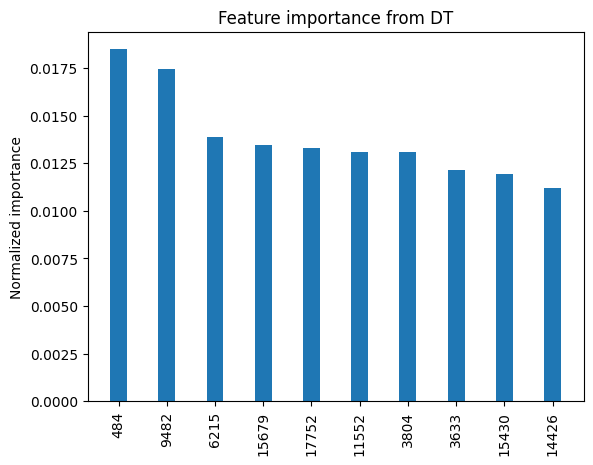

In [52]:
names_sorted = [x for _,x in sorted(zip(fi, range(X_train_tfidf.shape[0])), reverse = True)]
fig, ax = plt.subplots()
ax.bar(np.arange(10), sorted(best_DT.feature_importances_, reverse=True)[:10], width = 0.35)
ax.set_xticks(np.arange(10))
ax.set_xticklabels(names_sorted[:10], rotation = 90)
plt.title('Feature importance from DT')
ax.set_ylabel('Normalized importance')

In [53]:
vocab = tfidf_vectorizer.vocabulary_
for i in range(10):
    print(str(i+1) + ". " + list(vocab.keys())[list(vocab.values()).index(names_sorted[i])])

1. amaz
2. love
3. funni
4. surpris
5. weird
6. overwhelm
7. daze
8. curious
9. strang
10. shock


It makes sense to split on these words: many of them are strongly correlated with certain emotions. Words that directly describe the emotions are here, such as "love" and "surprise". 

<b>Confusion matrix:</b>

In [54]:
from sklearn.metrics import confusion_matrix

In [55]:
# Display a confusion matrix
print('Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)')

# Creating confusion matrix based on validation accuracy
class_label_predictions = best_DT.predict(X_val_tfidf)
c_m = confusion_matrix(y_val, class_label_predictions, labels=[0,1,2,3,4,5])

# Create a Pandas DataFrame out of the confusion matrix for display purposes
cm_DT = pd.DataFrame(
c_m,
columns=['P: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
index=['A: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
cm_DT

Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)


,P: sadness,joy,love,anger,fear,surprise
A: sadness,2478,119,131,221,148,33
joy,178,2822,392,102,77,87
love,36,226,1455,23,17,21
anger,53,141,87,2392,149,18
fear,46,62,64,77,2045,119
surprise,1,16,19,3,125,609


<b>Accuracy Score (on validation set): </b>

In [56]:
pred_DT = best_DT.predict(X_val_tfidf)
acc_DT = accuracy_score(y_val, pred_DT)
print("Accuracy Score: {}".format(acc_DT))

Accuracy Score: 0.8087308114035088


<b>Average Precision Score:</b>

In [57]:
from sklearn.preprocessing import label_binarize
from sklearn.metrics import average_precision_score
from sklearn.metrics import f1_score

In [58]:
y_score_DT = best_DT.predict_proba(X_val_tfidf)
# Converts probabilities into binary
y_val_binary_DT = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])

In [59]:
ap_score_DT = average_precision_score(y_val_binary_DT, y_score_DT)
print("Average precision score: {}".format(ap_score_DT))

Average precision score: 0.8641237732640095


<b>F1 Score:</b>

In [60]:
y_pred_DT = best_DT.predict(X_val_tfidf)
f1_score_DT = f1_score(y_val, y_pred_DT, average=None)
print("F1 Score: {}".format(f1_score_DT))

F1 Score: [0.83687943 0.80124929 0.74121243 0.84552846 0.82227583 0.73373494]


*['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

The f1_score is a harmonic mean of precision and recall. Each element in the array represents the f1_score for each class, and since they are relatively similar, the model performs similarly well across classes.

#### Random Forest

Next, I will test the performance of a Random Forest model.

In [61]:
from sklearn.ensemble import RandomForestClassifier

In [62]:
# n_estimators = [20]
# Temporarily set to just one value to speed up runtime when kernel dies.
n_estimators = [20,75,100]

*I would have used scikit-learn's `validation_curve` to perform 5-fold cross validation, but it was taking a while to run on my computer so I decided to loop through n_estimators manually and use the X_val subset I created earlier for validation.

In [63]:
def train_test_RF(X_train, X_val, y_train, y_val, n_estimators, criterion='entropy'):
    RF_model = RandomForestClassifier(criterion='entropy', n_estimators=n)
    RF_model.fit(X_train_tfidf, y_train)
    RF_predictions = RF_model.predict(X_val_tfidf)
    return accuracy_score(y_val, RF_predictions)

In [64]:
print('Implementing Random Forest...')
RF_acc = []
for n in n_estimators:
    acc_score = train_test_RF(X_train_tfidf, X_val_tfidf, y_train, y_val, n_estimators=n)
    print("N-Estimators = {}: ".format(n) + "Validation accuracy: {}".format(acc_score))
    RF_acc.append(acc_score)
print("Done!")

Implementing Random Forest...
N-Estimators = 20: Validation accuracy: 0.8397066885964912
N-Estimators = 75: Validation accuracy: 0.8492324561403509
N-Estimators = 100: Validation accuracy: 0.8519736842105263
Done!


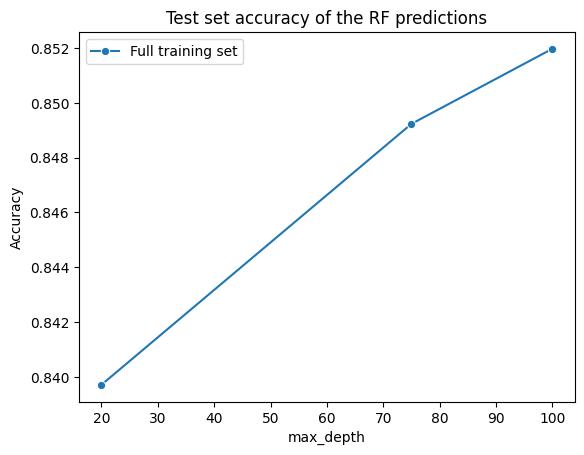

In [65]:
fig = plt.figure()
ax = fig.add_subplot(111)
p = sns.lineplot(x=n_estimators, y=RF_acc, marker='o', label = 'Full training set')

plt.title('Test set accuracy of the RF predictions')
ax.set_xlabel('max_depth')
ax.set_ylabel('Accuracy')
plt.show()

Since increasing the n_estimators from 20 to 100 barely impacts accuracy while significantly increasing the time, I will use `N-Estimators = 20`.

In [66]:
best_n = 20
best_RF = RandomForestClassifier(criterion='entropy', n_estimators = best_n)
best_RF.fit(X_train_tfidf, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=20)

<b>Confusion matrix:</b>

In [67]:
# Display a confusion matrix
print('Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)')

# Creating confusion matrix based on validation accuracy
class_label_predictions = best_RF.predict(X_val_tfidf)
c_m = confusion_matrix(y_val, class_label_predictions, labels=[0,1,2,3,4,5])

# Create a Pandas DataFrame out of the confusion matrix for display purposes
pd.DataFrame(
c_m,
columns=['P: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
index=['A: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])

Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)


,P: sadness,joy,love,anger,fear,surprise
A: sadness,2650,108,102,140,108,22
joy,87,3020,345,70,59,77
love,38,209,1478,28,17,8
anger,113,49,56,2505,105,12
fear,89,50,38,99,2024,113
surprise,12,20,19,7,137,578


<b>Accuracy Score (on validation set):</b>

In [68]:
pred_RF = best_RF.predict(X_val_tfidf)
acc_RF = accuracy_score(y_val, pred_RF)
print("Accuracy Score: {}".format(acc_RF))

Accuracy Score: 0.83984375


<b>Average Precision Score:</b>

In [69]:
y_score_RF = best_RF.predict_proba(X_val_tfidf)
# Converts probabilities into binary
y_val_binary_RF = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])

In [70]:
ap_score_RF = average_precision_score(y_val_binary_RF, y_score_RF)
print("Average precision score: {}".format(ap_score_RF))

Average precision score: 0.884766822540747


This shows that the average precision of the model is about 89%, which is not high but relatively accurate.

<b>F1_Score:</b>

In [71]:
y_pred_RF = best_RF.predict(X_val_tfidf)
f1_score_RF = f1_score(y_val, y_pred_RF, average=None)
print("F1 Score: {}".format(f1_score_RF))

F1 Score: [0.8661546  0.84903008 0.77463312 0.88064686 0.83240798 0.730259  ]


*['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']

The f1_score is a harmonic mean of precision and recall. Each element in the array represents the f1_score for each class, and since they are relatively similar, the model performs similarly well across classes.

#### Neural Network

In [72]:
import tensorflow.keras as keras
import time

2024-08-01 03:01:41.141542: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2024-08-01 03:01:41.141569: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [73]:
vocabulary_size = len(tfidf_vectorizer.vocabulary_)
print(vocabulary_size)

18401


I will create different variations of neural networks with different numbers of layers, dropout layers, and different numbers of units. Later, I will test different numbers of epochs.

In [74]:
# Create neural network model object
nn_model = keras.Sequential()

# Construct input layer 
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size, name='input')
nn_model.add(input_layer)
nn_model.add(keras.layers.Dropout(.25))

# Construct hidden layer 1
hidden_layer_1 = keras.layers.Dense(units=16, activation='relu', name='hl_1')
nn_model.add(hidden_layer_1)
nn_model.add(keras.layers.Dropout(.25))

# Construct hidden layer 2
hidden_layer_2 = keras.layers.Dense(units=16, activation='relu', name='hl_2')
nn_model.add(hidden_layer_2)
nn_model.add(keras.layers.Dropout(.25))

# Construct hidden layer 3
hidden_layer_3 = keras.layers.Dense(units=8, activation='relu', name='hl_3')
nn_model.add(hidden_layer_3)
nn_model.add(keras.layers.Dropout(.25))

# Construct Output layer 
output_layer = keras.layers.Dense(units=6, activation='softmax', name='output') # 6 classes
nn_model.add(output_layer)

# Print model summary
nn_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout (Dropout)            (None, 18401)             0         
_________________________________________________________________
hl_1 (Dense)                 (None, 16)                294432    
_________________________________________________________________
dropout_1 (Dropout)          (None, 16)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 16)                272       
_________________________________________________________________
dropout_2 (Dropout)          (None, 16)                0         
_________________________________________________________________
hl_3 (Dense)                 (None, 8)                 136       
_________________________________________________________________
dropout_3 (Dropout)          (None, 8)                 0

2024-08-01 03:01:44.707107: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2024-08-01 03:01:44.707132: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2024-08-01 03:01:44.707195: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (i-06c2572271fe90a1b): /proc/driver/nvidia/version does not exist
2024-08-01 03:01:44.707397: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [75]:
# Create neural network model object
nn_model_2 = keras.Sequential()

# Construct input layer 
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size, name='input')
nn_model_2.add(input_layer)
nn_model_2.add(keras.layers.Dropout(.25))

# Construct hidden layer 1
hidden_layer_1 = keras.layers.Dense(units=32, activation='relu', name='hl_1')
nn_model_2.add(hidden_layer_1)
nn_model_2.add(keras.layers.Dropout(.25))

# Construct hidden layer 2
hidden_layer_2 = keras.layers.Dense(units=16, activation='relu', name='hl_2')
nn_model_2.add(hidden_layer_2)
nn_model_2.add(keras.layers.Dropout(.25))

# Construct hidden layer 3
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
nn_model_2.add(hidden_layer_3)
nn_model_2.add(keras.layers.Dropout(.25))

# Construct hidden layer 4
hidden_layer_4 = keras.layers.Dense(units=8, activation='relu', name='hl_4')
nn_model_2.add(hidden_layer_4)
nn_model_2.add(keras.layers.Dropout(.25))

# Construct Output layer 
output_layer = keras.layers.Dense(units=6, activation='softmax', name='output') # 6 classes
nn_model_2.add(output_layer)

# Print model summary
nn_model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_4 (Dropout)          (None, 18401)             0         
_________________________________________________________________
hl_1 (Dense)                 (None, 32)                588864    
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 16)                528       
_________________________________________________________________
dropout_6 (Dropout)          (None, 16)                0         
_________________________________________________________________
hl_3 (Dense)                 (None, 16)                272       
_________________________________________________________________
dropout_7 (Dropout)          (None, 16)               

In [76]:
# Create neural network model object
nn_model_3 = keras.Sequential()

# Construct input layer 
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size, name='input')
nn_model_3.add(input_layer)
nn_model_3.add(keras.layers.Dropout(.25))

# Construct hidden layer 1
hidden_layer_1 = keras.layers.Dense(units=32, activation='relu', name='hl_1')
nn_model_3.add(hidden_layer_1)
nn_model_3.add(keras.layers.Dropout(.25))

# Construct hidden layer 2
hidden_layer_2 = keras.layers.Dense(units=16, activation='relu', name='hl_2')
nn_model_3.add(hidden_layer_2)
nn_model_3.add(keras.layers.Dropout(.25))

# Construct Output layer 
output_layer = keras.layers.Dense(units=6, activation='softmax', name='output') # 6 classes
nn_model_3.add(output_layer)

# Print model summary
nn_model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_9 (Dropout)          (None, 18401)             0         
_________________________________________________________________
hl_1 (Dense)                 (None, 32)                588864    
_________________________________________________________________
dropout_10 (Dropout)         (None, 32)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 16)                528       
_________________________________________________________________
dropout_11 (Dropout)         (None, 16)                0         
_________________________________________________________________
output (Dense)               (None, 6)                 102       
Total params: 589,494
Trainable params: 589,494
Non-trainable params: 0
________________________________________________

In [77]:
# Create neural network model object
nn_model_4 = keras.Sequential()

# Construct input layer 
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size, name='input')
nn_model_4.add(input_layer)
nn_model_4.add(keras.layers.Dropout(.25))

# Construct hidden layer 1
hidden_layer_1 = keras.layers.Dense(units=64, activation='relu', name='hl_1')
nn_model_4.add(hidden_layer_1)
nn_model_4.add(keras.layers.Dropout(.25))

# Construct hidden layer 2
hidden_layer_2 = keras.layers.Dense(units=32, activation='relu', name='hl_2')
nn_model_4.add(hidden_layer_2)
nn_model_4.add(keras.layers.Dropout(.25))

# Construct hidden layer 3
hidden_layer_3 = keras.layers.Dense(units=16, activation='relu', name='hl_3')
nn_model_4.add(hidden_layer_3)
nn_model_4.add(keras.layers.Dropout(.25))

# Construct Output layer 
output_layer = keras.layers.Dense(units=6, activation='softmax', name='output') # 6 classes
nn_model_4.add(output_layer)

# Print model summary
nn_model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_12 (Dropout)         (None, 18401)             0         
_________________________________________________________________
hl_1 (Dense)                 (None, 64)                1177728   
_________________________________________________________________
dropout_13 (Dropout)         (None, 64)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 32)                2080      
_________________________________________________________________
dropout_14 (Dropout)         (None, 32)                0         
_________________________________________________________________
hl_3 (Dense)                 (None, 16)                528       
_________________________________________________________________
dropout_15 (Dropout)         (None, 16)               

In [78]:
# Create neural network model object
nn_model_5 = keras.Sequential()

# Construct input layer 
input_layer = keras.layers.InputLayer(input_shape=vocabulary_size, name='input')
nn_model_5.add(input_layer)
nn_model_5.add(keras.layers.Dropout(.25))

# Construct hidden layer 1
hidden_layer_1 = keras.layers.Dense(units=16, activation='relu', name='hl_1')
nn_model_5.add(hidden_layer_1)
nn_model_5.add(keras.layers.Dropout(.25))

# Construct hidden layer 2
hidden_layer_2 = keras.layers.Dense(units=8, activation='relu', name='hl_2')
nn_model_5.add(hidden_layer_2)
nn_model_5.add(keras.layers.Dropout(.25))

# Construct Output layer 
output_layer = keras.layers.Dense(units=6, activation='softmax', name='output') # 6 classes
nn_model_5.add(output_layer)

# Print model summary
nn_model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dropout_16 (Dropout)         (None, 18401)             0         
_________________________________________________________________
hl_1 (Dense)                 (None, 16)                294432    
_________________________________________________________________
dropout_17 (Dropout)         (None, 16)                0         
_________________________________________________________________
hl_2 (Dense)                 (None, 8)                 136       
_________________________________________________________________
dropout_18 (Dropout)         (None, 8)                 0         
_________________________________________________________________
output (Dense)               (None, 6)                 54        
Total params: 294,622
Trainable params: 294,622
Non-trainable params: 0
________________________________________________

In [79]:
class ProgBarLoggerNEpochs(keras.callbacks.Callback):
    
    def __init__(self, num_epochs: int, every_n: int = 50):
        self.num_epochs = num_epochs
        self.every_n = every_n
    
    def on_epoch_end(self, epoch, logs=None):
        if (epoch + 1) % self.every_n == 0:
            s = 'Epoch [{}/ {}]'.format(epoch + 1, self.num_epochs)
            logs_s = ['{}: {:.4f}'.format(k.capitalize(), v)
                      for k, v in logs.items()]
            s_list = [s] + logs_s
            print(', '.join(s_list))

In [80]:
def plotLossNN(num_epochs, history):
    # Plot training and validation loss
    plt.plot(range(1, num_epochs + 1), history.history['loss'], label='Training Loss')
    plt.plot(range(1, num_epochs + 1), history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()
    # Plot training and validation accuracy
    plt.plot(range(1, num_epochs + 1), history.history['accuracy'], label='Training Accuracy')
    plt.plot(range(1, num_epochs + 1), history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend()
    plt.show()

2024-08-01 03:01:47.099858: W tensorflow/core/framework/cpu_allocator_impl.cc:80] Allocation of 3046322352 exceeds 10% of free system memory.
2024-08-01 03:01:50.278258: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2024-08-01 03:01:50.281452: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2649990000 Hz


Epoch [5/ 40], Loss: 1.0911, Accuracy: 0.6067, Val_loss: 0.8411, Val_accuracy: 0.6857
Epoch [10/ 40], Loss: 0.9713, Accuracy: 0.6564, Val_loss: 0.6030, Val_accuracy: 0.8254
Epoch [15/ 40], Loss: 0.9248, Accuracy: 0.6726, Val_loss: 0.5583, Val_accuracy: 0.8376
Epoch [20/ 40], Loss: 0.8987, Accuracy: 0.6841, Val_loss: 0.6516, Val_accuracy: 0.8094
Epoch [25/ 40], Loss: 0.8789, Accuracy: 0.6894, Val_loss: 0.5212, Val_accuracy: 0.8463
Epoch [30/ 40], Loss: 0.8567, Accuracy: 0.7013, Val_loss: 0.5355, Val_accuracy: 0.8303
Epoch [35/ 40], Loss: 0.8365, Accuracy: 0.7070, Val_loss: 0.5681, Val_accuracy: 0.8243
Epoch [40/ 40], Loss: 0.8306, Accuracy: 0.7103, Val_loss: 0.6606, Val_accuracy: 0.7801
Elapsed time: 130.28s


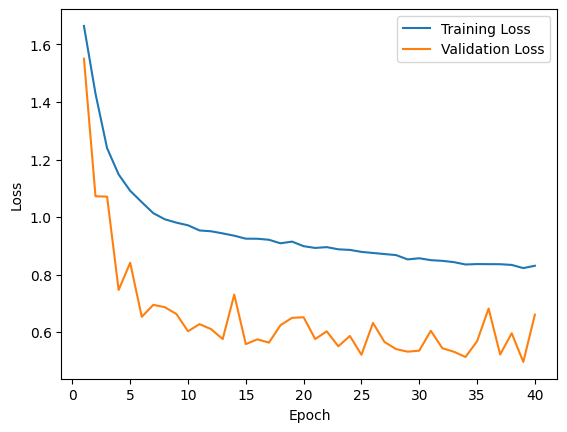

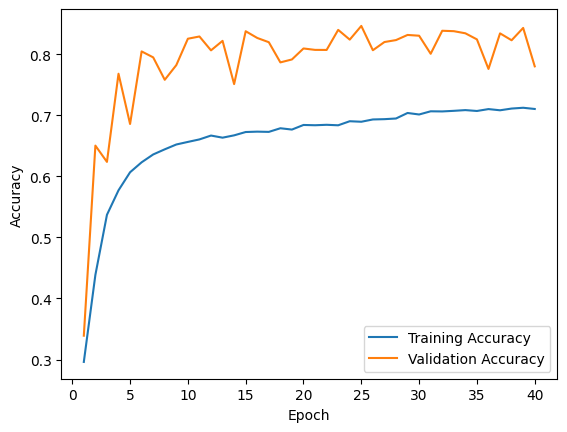

In [81]:
nn_model_list = [nn_model, nn_model_2,nn_model_3,nn_model_4,nn_model_5]

# Due to memory errors, I will manually test every model by replacing nn_model
# in the following code, and then provide an overview of all the findings.

sgd_optimizer = keras.optimizers.SGD(learning_rate=0.1)
# I am using Sparse Categorical Crossentropy as the loss function since this is a multiclass classification problem.
loss_fn = keras.losses.SparseCategoricalCrossentropy()

t0 = time.time() # start time
num_epochs = 40 # epochs
nn_model_5.compile(optimizer=sgd_optimizer, loss=loss_fn, metrics=['accuracy'])
history = nn_model_5.fit(
    X_train_tfidf.toarray(),
    y_train,
    epochs=num_epochs,
    verbose=0,
    validation_split=0.2,
    callbacks=[ProgBarLoggerNEpochs(num_epochs, every_n=5)],
)
t1 = time.time() # stop time
print('Elapsed time: %.2fs' % (t1-t0))
plotLossNN(num_epochs, history)

| Name              |   Hidden Layers (Units) |  25% Dropout (All Layers)  |
| :---------------- | :----------------: | :----------------: |
| nn_model            |   3 (16, 16, 8)     | no (added later)   |   
| nn_model_2            |   4 (32, 16, 16, 8)     | yes   | 
| nn_model_3            |   2 (32, 16)     | no (added later)   | 
| nn_model_4            |   3 (64, 32, 16)     | yes   | 
| nn_model_5           |  2 (16, 8)     | no (added later)  | 

<b>20 Epochs:</b>

`nn_model` 

Epoch [5/ 20], Loss: 0.3665, Accuracy: 0.8671, Val_loss: 0.5057, Val_accuracy: 0.8330 <br>
Epoch [10/ 20], Loss: 0.2251, Accuracy: 0.9153, Val_loss: 0.5755, Val_accuracy: 0.8079 <br>
Epoch [15/ 20], Loss: 0.1758, Accuracy: 0.9342, Val_loss: 0.6207, Val_accuracy: 0.8195 <br>
Epoch [20/ 20], Loss: 0.1427, Accuracy: 0.9466, Val_loss: 0.6678, Val_accuracy: 0.8202 <br>
Elapsed time: 45.43s 

`nn_model_2`

Epoch [5/ 20], Loss: 1.2585, Accuracy: 0.5321, Val_loss: 1.0578, Val_accuracy: 0.6358 <br>
Epoch [10/ 20], Loss: 1.1280, Accuracy: 0.5969, Val_loss: 0.8767, Val_accuracy: 0.7043 <br>
Epoch [15/ 20], Loss: 1.0641, Accuracy: 0.6233, Val_loss: 0.8104, Val_accuracy: 0.7104 <br>
Epoch [20/ 20], Loss: 1.0211, Accuracy: 0.6403, Val_loss: 0.7309, Val_accuracy: 0.7568 <br>
Elapsed time: 78.77s

`nn_model_3`

Epoch [5/ 20], Loss: 0.2736, Accuracy: 0.8937, Val_loss: 0.4465, Val_accuracy: 0.8323 <br>
Epoch [10/ 20], Loss: 0.1570, Accuracy: 0.9380, Val_loss: 0.9377, Val_accuracy: 0.7245 <br>
Epoch [15/ 20], Loss: 0.1033, Accuracy: 0.9594, Val_loss: 0.4980, Val_accuracy: 0.8532 <br>
Epoch [20/ 20], Loss: 0.1365, Accuracy: 0.9522, Val_loss: 0.5561, Val_accuracy: 0.8458 <br>
Elapsed time: 48.05s

`nn_model_4`

Epoch [5/ 20], Loss: 0.9078, Accuracy: 0.6901, Val_loss: 0.5555, Val_accuracy: 0.8485 <br>
Epoch [10/ 20], Loss: 0.7880, Accuracy: 0.7321, Val_loss: 0.5097, Val_accuracy: 0.8430 <br>
Epoch [15/ 20], Loss: 0.7453, Accuracy: 0.7442, Val_loss: 0.4895, Val_accuracy: 0.8336 <br>
Epoch [20/ 20], Loss: 0.7138, Accuracy: 0.7565, Val_loss: 0.5287, Val_accuracy: 0.8135 <br>
Elapsed time: 90.53s

`nn_model_5`

Epoch [5/ 20], Loss: 0.3138, Accuracy: 0.8833, Val_loss: 0.5244, Val_accuracy: 0.8137 <br>
Epoch [10/ 20], Loss: 0.1921, Accuracy: 0.9247, Val_loss: 0.4209, Val_accuracy: 0.8548 <br>
Epoch [15/ 20], Loss: 0.1405, Accuracy: 0.9441, Val_loss: 0.5223, Val_accuracy: 0.8426 <br>
Epoch [20/ 20], Loss: 0.1159, Accuracy: 0.9548, Val_loss: 0.5766, Val_accuracy: 0.8458 <br>
Elapsed time: 44.24s

<b>Notes:</b>
Since nn_model_2 and nn_model_4 are relatively slow, I'll only test higher numbers of epochs for the other models.

<b>50 Epochs:</b>

`nn_model`

Epoch [5/ 50], Loss: 0.3507, Accuracy: 0.8708, Val_loss: 0.5088, Val_accuracy: 0.8116 <br>
Epoch [10/ 50], Loss: 0.2120, Accuracy: 0.9192, Val_loss: 0.5191, Val_accuracy: 0.8194 <br>
Epoch [15/ 50], Loss: 0.1546, Accuracy: 0.9418, Val_loss: 1.5845, Val_accuracy: 0.5500 <br>
Epoch [20/ 50], Loss: 0.1224, Accuracy: 0.9541, Val_loss: 2.2632, Val_accuracy: 0.5461 <br>
Epoch [25/ 50], Loss: 0.1327, Accuracy: 0.9505, Val_loss: 1.7564, Val_accuracy: 0.6037 <br>
Epoch [30/ 50], Loss: 0.1115, Accuracy: 0.9628, Val_loss: 0.8599, Val_accuracy: 0.7907 <br>
Epoch [35/ 50], Loss: 0.0739, Accuracy: 0.9727, Val_loss: 0.8128, Val_accuracy: 0.8296 <br>
Epoch [40/ 50], Loss: 0.1039, Accuracy: 0.9609, Val_loss: 0.6791, Val_accuracy: 0.8444 <br>
Epoch [45/ 50], Loss: 0.1049, Accuracy: 0.9658, Val_loss: 0.7891, Val_accuracy: 0.8253 <br>
Epoch [50/ 50], Loss: 0.0634, Accuracy: 0.9772, Val_loss: 2.1326, Val_accuracy: 0.6443 <br>
Elapsed time: 90.35s

`nn_model_3`

Epoch [5/ 50], Loss: 0.2869, Accuracy: 0.8926, Val_loss: 0.3711, Val_accuracy: 0.8671 <br>
Epoch [10/ 50], Loss: 0.1635, Accuracy: 0.9377, Val_loss: 0.4789, Val_accuracy: 0.8405 <br>
Epoch [15/ 50], Loss: 0.1092, Accuracy: 0.9586, Val_loss: 0.5984, Val_accuracy: 0.8301 <br>
Epoch [20/ 50], Loss: 0.0901, Accuracy: 0.9674, Val_loss: 0.5831, Val_accuracy: 0.8376 <br>
Epoch [25/ 50], Loss: 0.0632, Accuracy: 0.9761, Val_loss: 0.5993, Val_accuracy: 0.8442 <br>
Epoch [30/ 50], Loss: 0.0530, Accuracy: 0.9799, Val_loss: 0.7402, Val_accuracy: 0.8284 <br>
Epoch [35/ 50], Loss: 0.0421, Accuracy: 0.9838, Val_loss: 0.7215, Val_accuracy: 0.8398 <br>
Epoch [40/ 50], Loss: 0.0467, Accuracy: 0.9821, Val_loss: 0.7043, Val_accuracy: 0.8390 <br>
Epoch [45/ 50], Loss: 0.0411, Accuracy: 0.9839, Val_loss: 0.7747, Val_accuracy: 0.8346 <br>
Epoch [50/ 50], Loss: 0.0367, Accuracy: 0.9862, Val_loss: 0.7847, Val_accuracy: 0.8381 <br>
Elapsed time: 105.23s

`nn_model_5`

Epoch [5/ 50], Loss: 0.3756, Accuracy: 0.8702, Val_loss: 0.4917, Val_accuracy: 0.8427 <br>
Epoch [10/ 50], Loss: 0.2088, Accuracy: 0.9220, Val_loss: 0.4300, Val_accuracy: 0.8503 <br>
Epoch [15/ 50], Loss: 0.1423, Accuracy: 0.9469, Val_loss: 0.7585, Val_accuracy: 0.8091 <br>
Epoch [20/ 50], Loss: 0.1043, Accuracy: 0.9625, Val_loss: 0.6474, Val_accuracy: 0.8277 <br>
Epoch [25/ 50], Loss: 0.0856, Accuracy: 0.9694, Val_loss: 0.8431, Val_accuracy: 0.8109 <br>
Epoch [30/ 50], Loss: 0.1079, Accuracy: 0.9604, Val_loss: 0.6653, Val_accuracy: 0.8312 <br>
Epoch [35/ 50], Loss: 0.0964, Accuracy: 0.9664, Val_loss: 0.6568, Val_accuracy: 0.8394 <br>
Epoch [40/ 50], Loss: 0.0549, Accuracy: 0.9797, Val_loss: 0.7845, Val_accuracy: 0.8373 <br>
Epoch [45/ 50], Loss: 0.0654, Accuracy: 0.9773, Val_loss: 0.7892, Val_accuracy: 0.8321 <br>
Epoch [50/ 50], Loss: 0.0451, Accuracy: 0.9831, Val_loss: 2.2883, Val_accuracy: 0.6895 <br>
Elapsed time: 90.77s

<b>Notes:</b>
The model seems to be overfitting, as the accuracy is very high while the validation accuracy is lower. These happen to be the models without dropout, so I'll add some dropout layers to them (note: I edited the original models to do this). I'll also try to decrease the number of epochs since the final values are either plateauing or going down from overfitting.

<b>40 Epochs:</b>

`nn_model (w/ dropout)`

Epoch [5/ 40], Loss: 1.1748, Accuracy: 0.5838, Val_loss: 0.7306, Val_accuracy: 0.7865 <br>
Epoch [10/ 40], Loss: 1.0298, Accuracy: 0.6430, Val_loss: 0.6723, Val_accuracy: 0.8099 <br>
Epoch [15/ 40], Loss: 0.9886, Accuracy: 0.6613, Val_loss: 0.6810, Val_accuracy: 0.7553 <br>
Epoch [20/ 40], Loss: 0.9592, Accuracy: 0.6757, Val_loss: 0.5432, Val_accuracy: 0.8413 <br>
Epoch [25/ 40], Loss: 0.9436, Accuracy: 0.6783, Val_loss: 0.6466, Val_accuracy: 0.7866 <br>
Epoch [30/ 40], Loss: 0.9310, Accuracy: 0.6823, Val_loss: 0.5671, Val_accuracy: 0.8354 <br>
Epoch [35/ 40], Loss: 0.9229, Accuracy: 0.6857, Val_loss: 0.7937, Val_accuracy: 0.6906 <br>
Epoch [40/ 40], Loss: 0.9028, Accuracy: 0.6924, Val_loss: 0.5516, Val_accuracy: 0.8320 <br>
Elapsed time: 138.24s

`nn_model_3 (w/ dropout)`

Epoch [5/ 40], Loss: 0.8803, Accuracy: 0.6983, Val_loss: 0.6580, Val_accuracy: 0.7876 <br>
Epoch [10/ 40], Loss: 0.7788, Accuracy: 0.7335, Val_loss: 0.5005, Val_accuracy: 0.8429 <br>
Epoch [15/ 40], Loss: 0.7420, Accuracy: 0.7447, Val_loss: 0.4568, Val_accuracy: 0.8509 <br>
Epoch [20/ 40], Loss: 0.7173, Accuracy: 0.7495, Val_loss: 0.4143, Val_accuracy: 0.8510 <br>
Epoch [25/ 40], Loss: 0.6842, Accuracy: 0.7622, Val_loss: 0.4880, Val_accuracy: 0.8374 <br>
Epoch [30/ 40], Loss: 0.6704, Accuracy: 0.7663, Val_loss: 0.4311, Val_accuracy: 0.8490 <br>
Epoch [35/ 40], Loss: 0.6607, Accuracy: 0.7704, Val_loss: 0.4493, Val_accuracy: 0.8445 <br>
Epoch [40/ 40], Loss: 0.6501, Accuracy: 0.7746, Val_loss: 0.4638, Val_accuracy: 0.8378 <br>
Elapsed time: 149.47s

`nn_model_5 (w/ dropout)`

Epoch [5/ 40], Loss: 1.1061, Accuracy: 0.6168, Val_loss: 0.8562, Val_accuracy: 0.7500 <br>
Epoch [10/ 40], Loss: 0.9641, Accuracy: 0.6687, Val_loss: 0.7997, Val_accuracy: 0.7376 <br>
Epoch [15/ 40], Loss: 0.9265, Accuracy: 0.6837, Val_loss: 0.6414, Val_accuracy: 0.8044 <br>
Epoch [20/ 40], Loss: 0.8908, Accuracy: 0.6915, Val_loss: 0.6282, Val_accuracy: 0.8103 <br>
Epoch [25/ 40], Loss: 0.8719, Accuracy: 0.7015, Val_loss: 0.7424, Val_accuracy: 0.7496 <br>
Epoch [30/ 40], Loss: 0.8460, Accuracy: 0.7035, Val_loss: 0.6148, Val_accuracy: 0.8004 <br>
Epoch [35/ 40], Loss: 0.8355, Accuracy: 0.7124, Val_loss: 0.5291, Val_accuracy: 0.8469 <br>
Epoch [40/ 40], Loss: 0.8226, Accuracy: 0.7147, Val_loss: 0.5719, Val_accuracy: 0.8356 <br>
Elapsed time: 134.41s

The models are performing very similarly well, so in the interest of minimizing runtime and choosing the simplest model that gets the job done, I chose `nn_model_5` as the best model.

In [82]:
best_NN = nn_model_5

In [83]:
class_label_predictions = best_NN.predict(X_val_tfidf.toarray())
class_label_predictions

array([[7.91514441e-02, 2.25512788e-01, 1.85006224e-02, 5.87850988e-01,
        7.91705027e-02, 9.81364213e-03],
       [1.10177770e-01, 3.93916965e-01, 2.33595029e-01, 8.71680677e-02,
        1.05661996e-01, 6.94801658e-02],
       [5.87954260e-02, 4.22491208e-02, 3.81330363e-02, 1.23018660e-01,
        7.18103886e-01, 1.96998343e-02],
       ...,
       [1.06099136e-02, 5.68321943e-02, 8.99303019e-01, 2.74633494e-04,
        3.29314061e-02, 4.88074584e-05],
       [9.19465274e-02, 3.64723623e-01, 3.28861654e-01, 4.99130674e-02,
        1.25374556e-01, 3.91805694e-02],
       [5.85334338e-02, 3.10961902e-01, 5.39061248e-01, 1.20162927e-02,
        7.20405877e-02, 7.38647021e-03]], dtype=float32)

The predictions are 6 probabilities, each corresponding to the probability that the example is in a specific class. The actual class numbers can be acquired by finding the index of the max of each of these sub-arrays.

In [84]:
predicted_classes = np.argmax(class_label_predictions, axis=1)
predicted_classes

array([3, 1, 4, ..., 2, 1, 2])

Here is a quick overview of some examples the model predicted with the tokenized/transformed text:

In [85]:
print("Text: {}".format(X_val.reset_index()['text'][5]))
print("Actual: {}".format(y_val.reset_index()['label'][5]))
print("Predicted: {}".format(predicted_classes[5]))

Text: ['felt', 'result', 'made', 'yes', 'thought', 'cute', 'fact', 'truli', 'made', 'care', 'love', 'power', 'touch', 'say', 'realli']
Actual: 1.0
Predicted: 1


In [86]:
print("Text: {}".format(X_val.reset_index()['text'][6000]))
print("Actual: {}".format(y_val.reset_index()['label'][6000]))
print("Predicted: {}".format(predicted_classes[6000]))

Text: ['babi', 'swore', 'didnt', 'came', 'devast', 'belli', 'look', 'birth']
Actual: 0.0
Predicted: 1


<b>Confusion matrix:</b>

In [87]:
# Display a confusion matrix
print('Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)')

# Creating confusion matrix based on validation accuracy
c_m = confusion_matrix(y_val, predicted_classes, labels=[0,1,2,3,4,5])

# Create a Pandas DataFrame out of the confusion matrix for display purposes
cm_NN = pd.DataFrame(
c_m,
columns=['P: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
index=['A: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
cm_NN

Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)


,P: sadness,joy,love,anger,fear,surprise
A: sadness,2172,619,81,124,117,17
joy,16,3225,330,28,36,23
love,8,322,1420,7,18,3
anger,72,345,14,2267,141,1
fear,16,136,98,72,2017,74
surprise,8,187,9,4,143,422


<b>Accuracy (on the validation set):</b>

In [88]:
pred_NN = np.argmax(best_NN.predict(X_val_tfidf.toarray()), axis=1)
acc_NN = accuracy_score(y_val, pred_NN)
print("Accuracy Score: {}".format(acc_NN))

Accuracy Score: 0.7896792763157895


<b>Average Precision Score: </b>

In [89]:
y_score_NN = best_NN.predict(X_val_tfidf) # already outputs probabilities
# Converts probabilities into binary
y_val_binary_NN = label_binarize(y_val, classes=[0, 1, 2, 3, 4, 5])

In [90]:
ap_score_NN = average_precision_score(y_val_binary_NN, y_score_NN)
print("Average precision score: {}".format(ap_score_NN))

Average precision score: 0.8763754774205884


<b>F1 Score:</b>

In [91]:
y_pred_NN = np.argmax(best_NN.predict(X_val_tfidf.toarray()), axis=1)
f1_score_NN = f1_score(y_val, y_pred_NN, average=None)
print("F1 Score: {}".format(f1_score_NN))

F1 Score: [0.80118038 0.75953839 0.7613941  0.84874579 0.82579324 0.64280274]


### Comparing Different Models

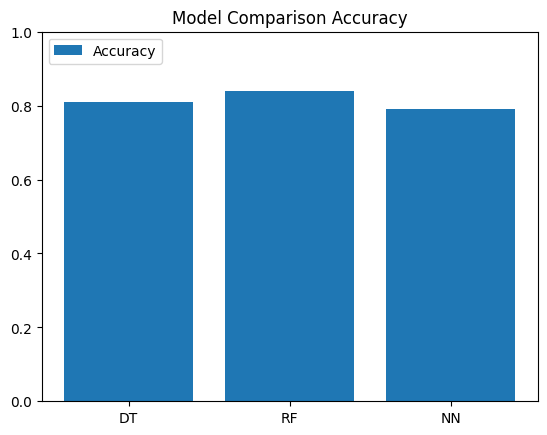

In [92]:
acc_scores = pd.DataFrame({'Model':['DT', 'RF', 'NN'], 'Accuracy':[acc_DT, acc_RF, acc_NN]})
# AP_scores.plot.bar(x='Model', y='AP_Score', rot=0)
plt.bar(x=acc_scores['Model'], height=acc_scores['Accuracy'])
plt.ylim([0,1])
plt.title("Model Comparison Accuracy")
plt.legend(['Accuracy'], loc='upper left', ncol=2)

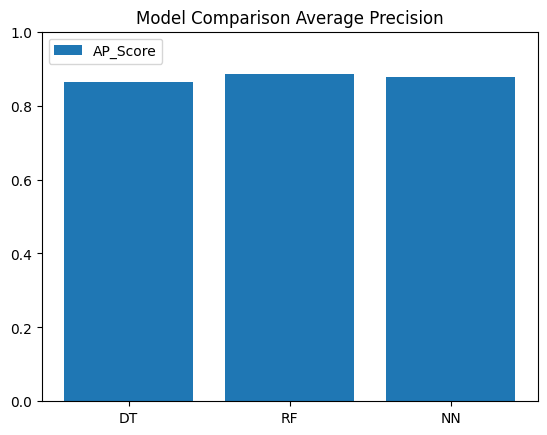

In [93]:
AP_scores = pd.DataFrame({'Model':['DT', 'RF', 'NN'], 'AP_Score':[ap_score_DT, ap_score_RF, ap_score_NN]})
# AP_scores.plot.bar(x='Model', y='AP_Score', rot=0)
plt.bar(x=AP_scores['Model'], height=AP_scores['AP_Score'])
plt.ylim([0,1])
plt.title("Model Comparison Average Precision")
plt.legend(['AP_Score'], loc='upper left', ncol=2)

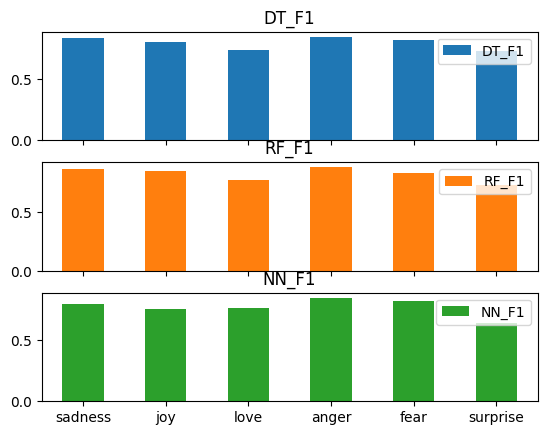

In [94]:
DT_F1 = f1_score_DT
RF_F1 = f1_score_RF
NN_F1 = f1_score_NN
index = ['sadness', 'joy', 'love', 'anger', 'fear', 'surprise']
f1_plot = pd.DataFrame({'DT_F1': DT_F1,
                   'RF_F1': RF_F1,
                   'NN_F1': NN_F1}, index=index)
ax = f1_plot.plot.bar(rot=0, subplots=True)

The f1 scores show that the model performs similarly well across classes, with some better performance seen in the better represented classes. Further study can be done with the df_equal dataset I created earlier to mitigate this, but the differences aren't so drastic that this would be necessary. Other misclassifications may be due to similarity of content, such as misclassifications between "joy" and "love", and "fear" and "surprise".

<b>Conclusion:</b> The models perform similarly well. The neural network has the best precision, but it's also somewhat random every time it runs (may not be the best precision when re-run). Random forest has the best accuracy, but not by enough to justify the extra runtime that comes with it. Upon further hyperparameter tuning, or testing other models such as GBDT, I may find a better model. However, for now, I will say that the best model is the most simple model, the decision tree, unless better accuracy can be achieved later with other models through further testing.

I will serialize the best decision tree model so that I can further test it on my Instagram comments in a personal extension of this project! I thought that the Tweets had similar content/vocabulary to the comments on my feed, and could possibly perform well.

All that's left is testing the best decision tree on the test set, which has been untouched.

### Testing the Final Model

In [95]:
best_DT = DecisionTreeClassifier(min_samples_leaf = best_min_leaf, max_depth = best_max_depth, criterion = 'entropy')
best_DT.fit(X_train_tfidf, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2048, min_samples_leaf=25)

In [101]:
# Display a confusion matrix
print('Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)')

# Creating confusion matrix based on validation accuracy
class_label_predictions = best_DT.predict(X_test_tfidf)
c_m = confusion_matrix(y_test, class_label_predictions, labels=[0,1,2,3,4,5])

# Create a Pandas DataFrame out of the confusion matrix for display purposes
cm_DT = pd.DataFrame(
c_m,
columns=['P: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'],
index=['A: sadness', 'joy', 'love', 'anger', 'fear', 'surprise'])
cm_DT

Confusion Matrix for the model: Predicted (Columns) x Actual (Rows)


,P: sadness,joy,love,anger,fear,surprise
A: sadness,1263,65,60,117,69,17
joy,122,1410,198,44,37,42
love,15,125,681,17,3,11
anger,32,66,59,1240,77,15
fear,16,25,29,22,1061,55
surprise,0,11,7,0,54,305


In [97]:
pred_DT = best_DT.predict(X_test_tfidf)
acc_DT = accuracy_score(y_test, pred_DT)
print("Accuracy Score: {}".format(acc_DT))

Accuracy Score: 0.8086838534599728


In [98]:
y_score_DT = best_DT.predict_proba(X_test_tfidf)
# Converts probabilities into binary
y_test_binary_DT = label_binarize(y_test, classes=[0, 1, 2, 3, 4, 5])

In [99]:
ap_score_DT = average_precision_score(y_test_binary_DT, y_score_DT)
print("Average precision score: {}".format(ap_score_DT))

Average precision score: 0.8648423037165568


In [100]:
y_pred_DT = best_DT.predict(X_test_tfidf)
f1_score_DT = f1_score(y_test, y_pred_DT, average=None)
print("F1 Score: {}".format(f1_score_DT))

F1 Score: [0.83119447 0.79324895 0.72216331 0.84670536 0.84575528 0.74209246]


#### Serializing the Model

In [102]:
import pickle
pkl_model_filename = "Twitter_Emotion_Classification_Model.pkl"  
pickle.dump(best_DT, open(pkl_model_filename, 'wb'))

<b>Citations:</b>

Bird, Steven, Edward Loper and Ewan Klein (2009), Natural Language Processing with Python. O’Reilly Media Inc.